In [ ]:
import zipfile
import os
import numpy as np 
from PIL import Image

In [ ]:
os.chdir('./drive/MyDrive/cs_475_final')
!pwd

/content/drive/MyDrive/cs_475_final


In [ ]:
#we have changed the image sizes here for different upscaling factors
#upscaling_factor=2 has original images of size 224*224 and low resolution images of size 112*112
#upscaling_factor=3 has original images of size 222*222 and low resolution images of size 74*74
#upscaling_factor=4 has original images of size 224*224 and low resolution images of size 56*56

dev_orig = np.zeros((300, 222, 222), dtype = 'int')
dev_orig = np.reshape(dev_orig, (100, 3, 222, 222))
dev_low_res = np.zeros((300, 74, 74), dtype = 'int')
dev_low_res = np.reshape(dev_low_res, (100, 3, 74, 74))

In [ ]:
for i in range(100):
  img_current = Image.open("DIV2K_test/DIV2K_valid_HR/"+format(i+801, '04')+".png")
  lower_bound_h = int(img_current.size[0]/2)-400
  lower_bound_v = int(img_current.size[1]/2)-400
  upper_bound_h = int(img_current.size[0]/2)+400
  upper_bound_v = int(img_current.size[1]/2)+400
  img_current = img_current.crop((lower_bound_h, lower_bound_v, upper_bound_h, upper_bound_v))
  img_current = img_current.resize((222, 222), Image.ANTIALIAS)
  img_low_res = img_current.resize((74, 74), Image.BICUBIC)
  img_current = np.transpose(img_current, axes = [2, 0, 1])
  img_low_res = np.transpose(img_low_res, axes = [2, 0, 1])
  dev_orig[i] = img_current
  dev_low_res[i] = img_low_res

In [ ]:
np.save('dev_orig_3x.npy',dev_orig)
np.save('dev_low_res_3x.npy', dev_low_res)

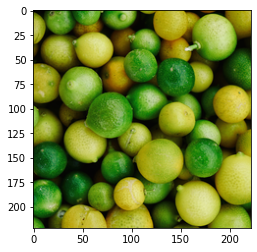

In [ ]:
from matplotlib import pyplot as plt
img_array = np.load('dev_orig_3x.npy')
plt.imshow(np.transpose(img_array[1], axes = [1, 2, 0]))
#plt.savefig("dev_orig_image_example_4x.png")

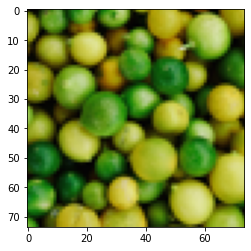

In [ ]:
from matplotlib import pyplot as plt
img_array = np.load('dev_low_res_3x.npy')
plt.imshow(np.transpose(img_array[1], axes = [1, 2, 0]))
#plt.savefig("low_res_image_example_4x.png")